In [1]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
#load breast cancer data
BreastData = load_breast_cancer()
#X Data
X = BreastData.data
#y Data
Y = BreastData.target

In [3]:
print ('The shape of X_train is: ' + str(X.shape))
print ('The shape of y_train is: ' + str(Y.shape))
print ('We have m = %d training examples' % (len(Y)))

The shape of X_train is: (569, 30)
The shape of y_train is: (569,)
We have m = 569 training examples


In [4]:
#Splitting data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=44, shuffle =True)


###  Sigmoid function
$$g(z) = \frac{1}{1+e^{-z}}$$


### Cost function for logistic regression
  Implement the cost function for logistic regression.
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$
where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

### Gradient for logistic regression
###compute_gradient
 function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$

### Evaluating logistic regression
  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$

In [5]:
# Build Logistic Regression
class MyModel() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
    # Sigmoid Function
    @staticmethod
    def sigmoid(z): 
        g = 1/(1+np.exp(-z))  
        return g 
  
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
        Z=self.X.dot( self.W ) + self.b            
        A = self.sigmoid (Z) 
          
        # calculate gradients        
        tmp = ( A - self.Y )      
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
    # cost function
    def cost(self,X,Y):
        m, n = X.shape
        total_cost = 1
        for i in range(m):
            Z = np.dot(X[i], self.W) + self.b                                   
            A = self.sigmoid(Z) 
            #loss equation                                         
            total_cost += (-Y[i]*np.log(A)) - ((1-Y[i])*np.log(1-A))      
             
        total_cost /= m
        return total_cost
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) : 
        Z=X.dot( self.W ) + self.b 
        A = self.sigmoid (Z)        
        Y = np.where( A > 0.5, 1, 0 )        
        return Y

In [6]:
def accuracy(Y_test,Y_pred):
    correctly_classified = 0
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
              
        count = count + 1
          
    return  (correctly_classified / count ) * 100 

In [7]:
# Model training    
model = MyModel( learning_rate = 0.01, iterations = 15000)
model.fit( X_train, Y_train ) 
#built in model   
model1 = LogisticRegression()    
model1.fit( X_train, Y_train)

LogisticRegression()

In [8]:
# Prediction on test set
Y_pred = model.predict( X_test )    
Y_pred1 = model1.predict( X_test )

In [9]:
#Calculating Accuracy Score        
print( "Accuracy on test set by our model       :  ",accuracy(Y_test, Y_pred))
print( "Accuracy on test set by sklearn model   :  ",accuracy(Y_test, Y_pred1))

Accuracy on test set by our model       :   94.21052631578948
Accuracy on test set by sklearn model   :   94.73684210526315


Confusion Matrix on my model : 
 [[ 65   4]
 [  7 114]]
Confusion Matrix in built in model : 
 [[ 64   5]
 [  5 116]]


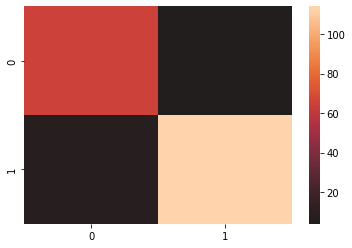

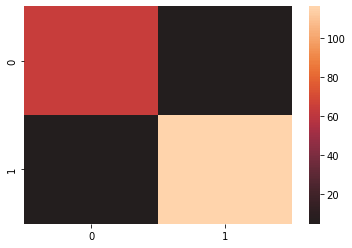

In [10]:
#Calculating Confusion Matrix
CM = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix on my model : \n', CM)
CM1 = confusion_matrix(Y_test, Y_pred1)
print('Confusion Matrix in built in model : \n', CM1)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
sns.heatmap(CM1,center = True)
plt.show()